# Object-Oriented Programming
- 문제 해결을 위해 개발자가 직접 필요한 데이터 모델을 만들기 위해 새로운 class를 만들어 사용할 수 있음

## *Fraction* Class
- 분수(Fraction)를 추상화한 클래스를 만들어보겠음

In [14]:
class Fraction:
    pass

In [15]:
f1 = Fraction()
f1

<__main__.Fraction instance at 0x10b1bd050>

### __init__ 로 클래스 초기화하기
- 인스턴스(Instance)가 생성될때 항상 실행

In [16]:
class Fraction:
    def __init__(self, top, bottom):
        self.num = top
        self.den = bottom

In [17]:
f1 = Fraction(3, 5)
f1

<__main__.Fraction instance at 0x10b1c13b0>

- Figure 5: Fraction 클래스의 인스턴스

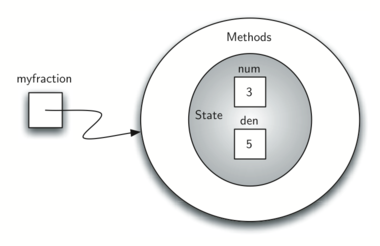

In [19]:
from IPython.display import Image
Image(filename='./figure/fraction1.png')

### 메소드 추가

In [20]:
class Fraction:
    def __init__(self, top, bottom):
        self.num = top
        self.den = bottom
    
    def show(self):
        print("{}/{}".format(self.num, self.den))

In [21]:
f1 = Fraction(3, 5)

In [22]:
f1.show()

3/5


In [23]:
print(f1)

<__main__.Fraction instance at 0x10b1c1f80>


### 객체를 문자열로 출력
- \_\_str\_\_ 매직 메소드를 사용해서 객체를 문자열로 변환
    - 기본적으로 이 메소드는 인스턴스의 주소를 반환하도록 구현되어 있음
    - 이 메소드의 동작을 재정의해서 **오버라이드(override)**

In [29]:
class Fraction:
    def __init__(self, top, bottom):
        self.num = top
        self.den = bottom
        
    def __str__(self):
        return "{}/{}".format(str(self.num), str(self.den))

In [30]:
f1 = Fraction(3, 5)

In [31]:
print(f1)

3/5


In [32]:
f1.__str__()

'3/5'

In [33]:
print("너의 분수를 알라!! 이거? {}".format(f1))

너의 분수를 알라!! 이거? 3/5


### 객체끼리 연산(그 중에 더하기)

In [36]:
f1 = Fraction(1, 4)
f2 = Fraction(1, 2)
f1 + f2

TypeError: unsupported operand type(s) for +: 'instance' and 'instance'

- \_\_add\_\_ 매직 메소드로 객체를 더하기

In [46]:
class Fraction:
    def __init__(self, top, bottom):
        self.num = top
        self.den = bottom
        
    def __str__(self):
        return "{}/{}".format(str(self.num), str(self.den))
    
    def __add__(self, other_fraction):
        return self.__str__() + ' ' + other_fraction.__str__()

In [47]:
f1 = Fraction(1, 4)
f2 = Fraction(1, 2)
f1.__add__(f2)

'1/4 1/2'

In [48]:
f1 + f2

'1/4 1/2'

- 분수끼리의 덧셈은 분모가 같아야함

In [56]:
class Fraction:
    def __init__(self, top, bottom):
        self.num = top
        self.den = bottom
        
    def __str__(self):
        return "{}/{}".format(str(self.num), str(self.den))
    
    def __add__(self, other_fraction):
        newnum = self.num * other_fraction.den + self.den * other_fraction.num
        newden = self.den * other_fraction.den
        
        return Fraction(newnum, newden)

In [57]:
f1 = Fraction(1, 4)
f2 = Fraction(1, 2)
f3 = f1 + f2

print(f3)

6/8


- 결과로 나온 새로운 분수값을 기약분수(lowest terms)가 되도록
    - 분모, 분자의 최대공약수(the greatest common divisor)로 각각 나눠 서로소 관계(relatively prime)가 되어야함
        - 서로소 관계는 두 수의 공약수가 1밖에 없는 관계를 말함

In [60]:
def gcd(m, n):
    while m % n != 0:
        oldm = m
        oldn = n
        
        m = oldn
        n = oldm % oldn
    return n

In [61]:
gcd(20, 10)

10

In [62]:
class Fraction:
    def __init__(self, top, bottom):
        self.num = top
        self.den = bottom
        
    def __str__(self):
        return "{}/{}".format(str(self.num), str(self.den))
    
    def __add__(self, other_fraction):
        newnum = self.num * other_fraction.den + self.den * other_fraction.num
        newden = self.den * other_fraction.den
        common = gcd(newnum, newden)
        return Fraction(newnum / common, newden / common)

In [64]:
f1 = Fraction(1, 4)
f2 = Fraction(1, 2)
f3 = f1 + f2

print(f3)

3/4


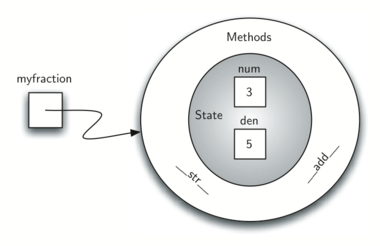

In [66]:
from IPython.display import Image
Image(filename='./figure/fraction2.png')

## Inheritance
- 어떤 클래스를 만들 때 다른 클래스의 기능을 상속받을 수 있음
- Python2 에서는 올드 스타일 클래스(old-style class)와 뉴 스타일 클래스(new-style class)가 공존하고, object를 명시적으로 상속받으면 뉴 스타일 클래스를 사용할 수 있음
- Python3 는 올드 스타일 클래스가 사라지고 명시적으로 object를 상속받지 않아도 항상 뉴 스타일 클래스로 정의됨

### old-style class 

In [44]:
class SampleA:
    def __init__(self, bar):
        self.bar = bar
    def say(self):
        print("Hello {}".format(self.bar))

class SampleB(SampleA):
    def __init__(self, bar):
        SampleA.__init__(self, bar)

In [60]:
b = SampleB('test')
b.say()

Hello test


In [61]:
type(b)

__main__.SampleB

### new-style Class (Python2.2 에서 추가)

In [62]:
class NewSampleA(object):
    def __init__(self, bar):
        self.bar = bar
    def say(self):
        print("Hello {}".format(self.bar))

class NewSampleB(SampleA):
    def __init__(self, bar):
        super(NewSampleB, self).__init__(bar)

In [63]:
new_b = NewSampleB('test')
new_b.say()

Hello test
